# Diagonalization of XZX model for systems of relative low size
This notebook checks if the ground state is degenerate for OBC and non-degenerate for PBC. It also calculates how the time scale with the size of the system for full matrix, sparse matrix and sparse block matrix.

In [15]:
import functions
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.linalg import block_diag
from numpy.linalg import eigh
from scipy.sparse.linalg import eigsh

## Ground state degeneracy

In [16]:
L = 6

### PBC

#### Full Matrix

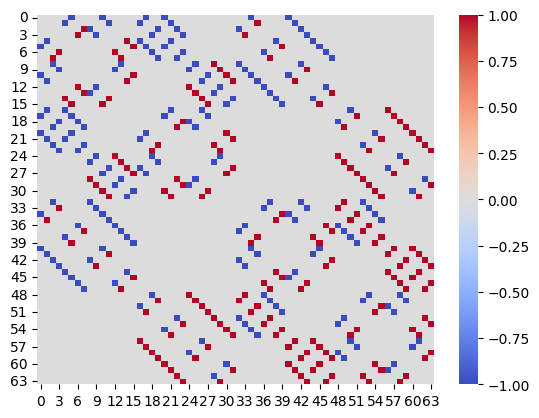

In [17]:
h = np.zeros((2**L,2**L))

for n in range(2**L): 
    output = functions.apply_H(n, L, pbc=True)
    for m in output:
        h[n,m[1]] += m[0]

sns.heatmap(h, cmap='coolwarm')#, linecolor='white', linewidth=0.2)
plt.show()

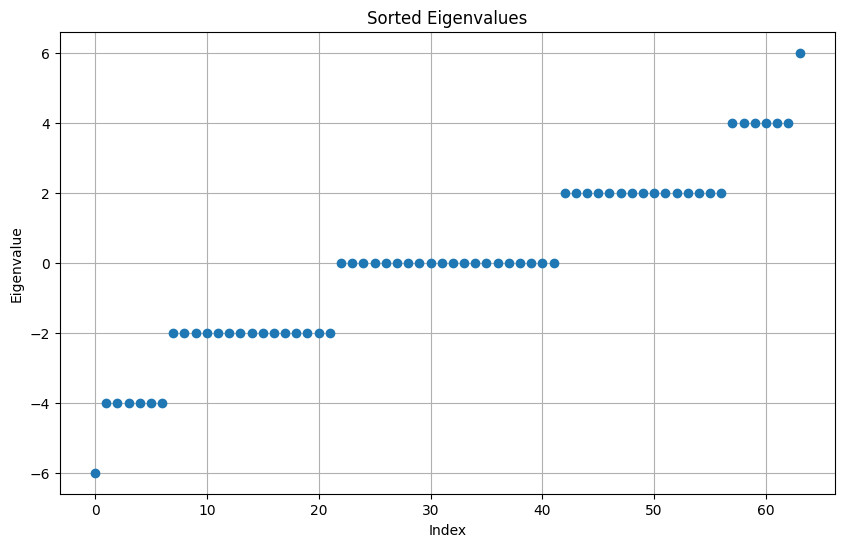

In [18]:
from numpy.linalg import eig

# Diagonalize the matrix h
eigenvalues, _ = eigh(h)


# Sort the eigenvalues from lowest to highest
sorted_eigenvalues = np.sort(np.real(eigenvalues))

plt.figure(figsize=(10, 6))
plt.plot(sorted_eigenvalues, 'o')
plt.title('Sorted Eigenvalues')
plt.xlabel('Index')
plt.ylabel('Eigenvalue')
plt.grid(True)
plt.show()

#### Translational Simmetry

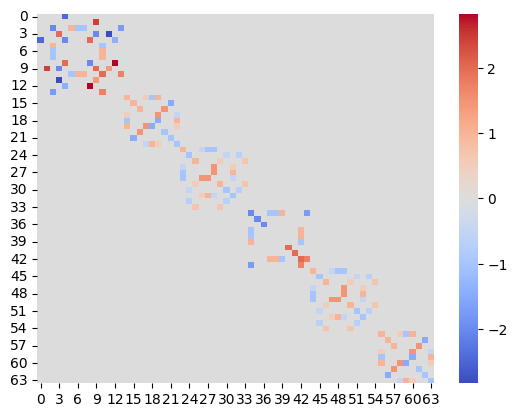

In [19]:
zero = functions.build_HK(L,0)
h = block_diag(zero,functions.build_HK(L,1))
for k in range(2,L):
    h=block_diag(h,functions.build_HK(L,k))

sns.heatmap(np.real(h), cmap='coolwarm')#, linecolor='white', linewidth=0.2)
plt.show()

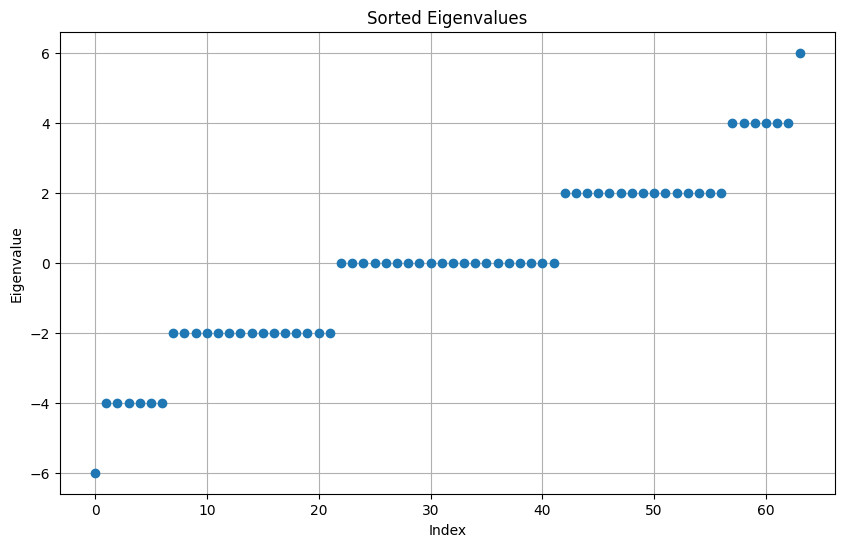

In [20]:
from numpy.linalg import eig

# Diagonalize the matrix h
eigenvalues, _ = eigh(h)


# Sort the eigenvalues from lowest to highest
sorted_eigenvalues = np.sort(np.real(eigenvalues))

plt.figure(figsize=(10, 6))
plt.plot(sorted_eigenvalues, 'o')
plt.title('Sorted Eigenvalues')
plt.xlabel('Index')
plt.ylabel('Eigenvalue')
plt.grid(True)
plt.show()

### OBC

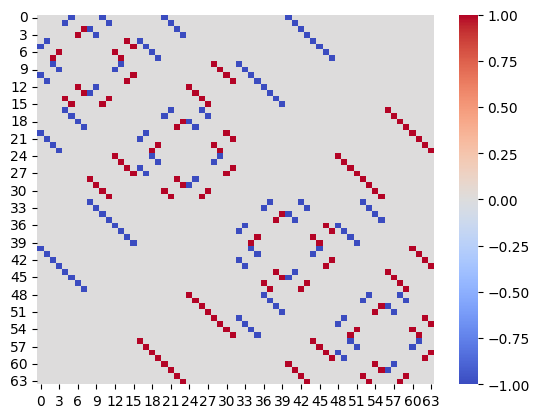

In [21]:
h = np.zeros((2**L,2**L))

for n in range(2**L):
    output = functions.apply_H(n, L, pbc=False)
    for m in output:
        h[n,m[1]] += m[0]

sns.heatmap(h, cmap='coolwarm')#, linecolor='white', linewidth=0.2)
plt.show()

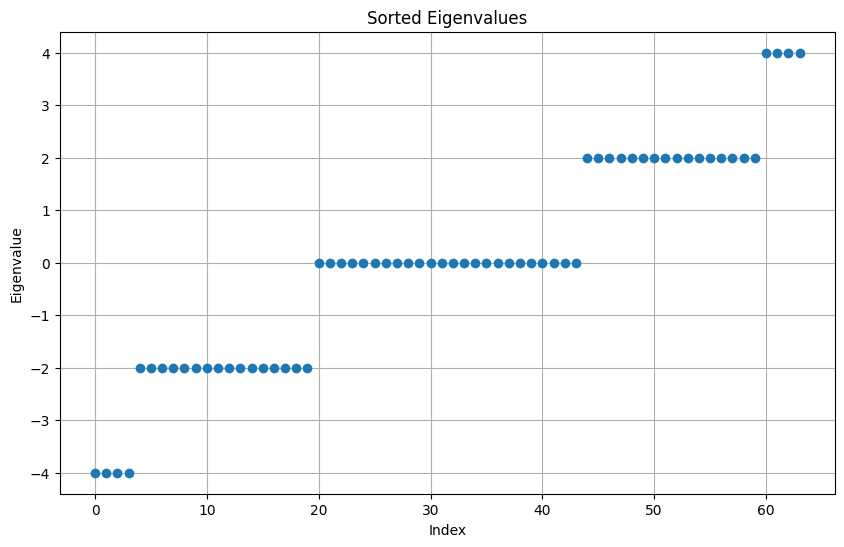

In [22]:
from numpy.linalg import eig

# Diagonalize the matrix h
eigenvalues, _ = eigh(h)


# Sort the eigenvalues from lowest to highest
sorted_eigenvalues = np.sort(np.real(eigenvalues))

plt.figure(figsize=(10, 6))
plt.plot(sorted_eigenvalues, 'o')
plt.title('Sorted Eigenvalues')
plt.xlabel('Index')
plt.ylabel('Eigenvalue')
plt.grid(True)
plt.show()

## Time scaling

### Full matrix

In [23]:
import time

sizes = [3,4,5,6,7,8,9,10,11]
creation_times1 = []
diagonalization_times1 = []

for size in sizes:
    start_time = time.time()
    h = functions.build_fullH(size)
    creation_time = time.time() - start_time
    creation_times1.append(creation_time)
    
    start_time = time.time()
    eigenvalues, _ = eigh(h)
    diagonalization_time = time.time() - start_time
    diagonalization_times1.append(diagonalization_time)

In [24]:
creation_times2 = []
diagonalization_times2 = []

for size in sizes:
    start_time = time.time()
    h = functions.build_fullH(size,sparse=True)
    creation_time = time.time() - start_time
    creation_times2.append(creation_time)
    
    start_time = time.time()
    eigenvalues, _ = eigsh(h, k=int(size/2))
    diagonalization_time = time.time() - start_time
    diagonalization_times2.append(diagonalization_time)

/home/christian/myenv/lib/python3.12/site-packages/scipy/sparse/_index.py:108: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil and dok are more efficient.
  self._set_intXint(row, col, x.flat[0])


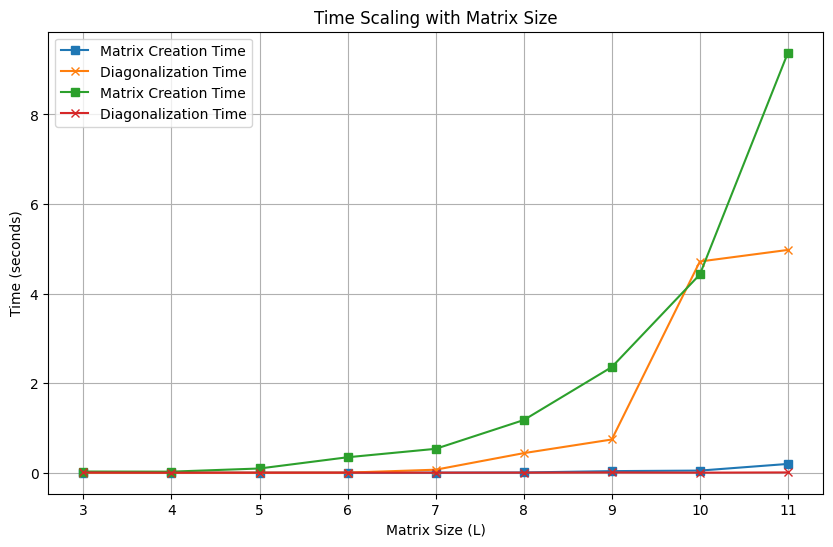

In [25]:
plt.figure(figsize=(10, 6))
plt.plot(sizes, creation_times1, 's-', label='Matrix Creation Time')
plt.plot(sizes, diagonalization_times1, 'x-', label='Diagonalization Time')
plt.plot(sizes, creation_times2, 's-', label='Matrix Creation Time')
plt.plot(sizes, diagonalization_times2, 'x-', label='Diagonalization Time')
plt.title('Time Scaling with Matrix Size')
plt.xlabel('Matrix Size (L)')
plt.ylabel('Time (seconds)')
plt.legend()
plt.grid(True)
plt.show()